<a href="https://colab.research.google.com/github/SushilKokare/AtiNeu_Project/blob/keras.applications/KA_6_ResNet101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras import backend as k
from keras.applications.resnet import ResNet101
from matplotlib import pyplot as plt

In [4]:
def show_result(history):
  plt.figure(figsize=(5,3))
  plt.title("Loss Training Vs Validation")
  plt.plot(history.history['loss'],color='blue',label='Train Loss')
  plt.plot(history.history['val_loss'],color='orange',label='Val Loss')
  plt.legend()
  plt.show()

  plt.figure(figsize=(5,3))
  plt.title("Accuracy Training Vs Validation")
  plt.plot(history.history['accuracy'],color='blue',label='Train Acc')
  plt.plot(history.history['val_accuracy'],color='orange',label='Val Acc')
  plt.legend()
  plt.show()

In [5]:
def prepro_data(pathTrain,pathTest,img_size,batch_size):
  
  if k.image_data_format() == 'channels_first':
    input_shape = (3,img_size[0],img_size[1])
  else:
    input_shape = (img_size[0],img_size[1],3)

  train_gen = ImageDataGenerator(rescale = 1./255)
  test_gen = ImageDataGenerator(rescale = 1./255)

  train_data = train_gen.flow_from_directory(
      pathTrain,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  ) 

  test_data = test_gen.flow_from_directory(
      pathTest,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  )

  print(" Train Data Image Shape = {}".format(train_data.image_shape))
  print(" Test Data Image Shape = {}".format(test_data.image_shape))
  print("Input Shape = {} ".format(input_shape))

  return train_data , test_data , input_shape

In [6]:
pathTrain = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Train'
pathTest = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Test'

In [7]:
train_data , test_data, input_shape = prepro_data(pathTrain,pathTest,(225,225),32)

Found 2251 images belonging to 2 classes.
Found 250 images belonging to 2 classes.
 Train Data Image Shape = (225, 225, 3)
 Test Data Image Shape = (225, 225, 3)
Input Shape = (225, 225, 3) 


In [9]:
base_model = ResNet101(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

171446536/171446536 [==============================] - 1s 0us/step


In [10]:
for layer in base_model.layers:
  layer.trainable = False


model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
71/71 [==============================] - 699s 10s/step - loss: 3.2727 - accuracy: 0.6899 - val_loss: 0.7657 - val_accuracy: 0.6360
Epoch 2/10
71/71 [==============================] - 701s 10s/step - loss: 0.7265 - accuracy: 0.7410 - val_loss: 1.2384 - val_accuracy: 0.6640
Epoch 3/10
71/71 [==============================] - 702s 10s/step - loss: 0.3498 - accuracy: 0.8543 - val_loss: 0.6864 - val_accuracy: 0.7160
Epoch 4/10
71/71 [==============================] - 686s 10s/step - loss: 0.2376 - accuracy: 0.8925 - val_loss: 0.7466 - val_accuracy: 0.6960
Epoch 5/10
71/71 [==============================] - 695s 10s/step - loss: 0.1557 - accuracy: 0.9445 - val_loss: 0.6092 - val_accuracy: 0.7320
Epoch 6/10
71/71 [==============================] - 677s 10s/step - loss: 0.1211 - accuracy: 0.9587 - val_loss: 0.8945 - val_accuracy: 0.6600
Epoch 7/10
71/71 [==============================] - 682s 10s/step - loss: 0.0997 - accuracy: 0.9685 - val_loss: 1.3442 - val_accuracy: 0.6000
Epoch 

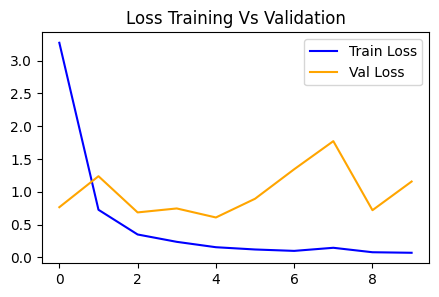

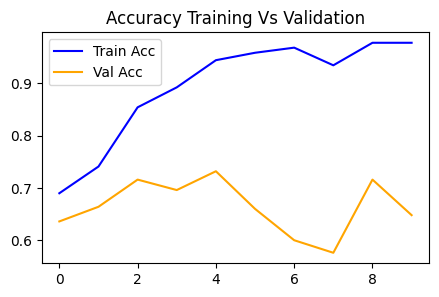

In [11]:
history = model.fit(train_data,epochs=10,validation_data=test_data)

show_result(history)